<br>
<font size=6>Machine Learning / <b>level 1</b></font>
<br>
<br>
<i>"Главное в шахматах это не то, на сколько ходов вперед ты думаешь, а то, как ты анализируешь текущую ситуацию".</i><br>
<br>
В этом занятие идет продолжение изучения основ ML,<br>
мы изучим новые темы, которые нам необходимо знать:<br>

- Missing Values.
- Categorical Variables
- Pipelines
- Cross-validation
- XGBoost
- Data Leakage
<br><br>

Материалы занятия:
- Курс по machine learning на kaggle https://www.kaggle.com/learn

<br>
<font size=6>Эпизод Ⅰ</font><br>
<br>
<font size=5>Missing Values</font>
<hr>
Зачастую данные, с которыми мы работаем, будут иметь пропуски, важно уметь правильно работать с ними.<br>
Большинство библиотек машинного обучения (включая scikit-learn) выдают ошибку, если вы пытаетесь построить модель, используя данные с пропущенными значениями.<br>
Мы рассмотрим <b>три популярных метода борьбы с missing values</b>.<br>
<br>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/melb_data.csv')

In [6]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [7]:
numerical_columns = [col for col in data
                    if data[col].dtype in ['int64', 'float64']]
X = data[numerical_columns]

In [8]:
X.isnull().sum()

Rooms               0
Price               0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Lattitude           0
Longtitude          0
Propertycount       0
dtype: int64

<br>
<font size='4'>1. Drop</font><br>
<br>
Самый простой способ избавиться от пропусков просто удалить их:<br>

<br>
функция <b>dropna()</b> удалит все пропуски в датасете.<br>
аргумент axis - указывает на ось, по которой будут удаляться пропуски.<br>
По дефолту axis=0 - будут удалены строки с пропусками.<br>
Если поставить axis=1 - будут удалены признаки с пропусками.<br>
<br>

In [6]:
X.dropna(inplace=True)

In [7]:
X.isnull().sum()

Rooms            0
Price            0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Lattitude        0
Longtitude       0
Propertycount    0
dtype: int64

In [8]:
y = X.Price # целевая переменная
X.drop(['Price'], axis=1, inplace=True)

In [9]:
def get_mae(train_X, val_X, train_y, val_y):
    model = RandomForestRegressor(n_estimators=10, random_state=0)
    model.fit(train_X, train_y)
    predict = model.predict(val_X)
    print(f'MAE: {mean_absolute_error(predict, val_y)}')
    
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)
get_mae(train_X, val_X, train_y, val_y)

MAE: 180243.58967789166


<br>
Если требуется удалять пропуски выборочно, например, в одном признаке 9 пропусков из 10000 объектов, а в другом 4000 пропусков из 10000 объектов.<br>
Удалять 40% данных не очень правильно, следовательно для первого признака мы применяем тактику удаления, а для другого уже используем другую. <br>
Получается dropna() не поможет, так как он удалит все объекты.<br>
В таком случае нам поможет функция <b>drop()</b>.<br>
<br>
Метод <b>drop()</b> удаляет указанную строку или столбец.<br>
<br>
Указав ось столбца (axis='columns'), метод <b>drop()</b> удаляет указанный столбец.<br>
<br>
Указав ось строки (axis='index'), метод <b>drop()</b> удаляет указанную строку.<br>
<br>

In [102]:
X.isnull().sum()

Rooms               0
Price               0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Lattitude           0
Longtitude          0
Propertycount       0
dtype: int64

In [103]:
car_index_nan = X[X.Car.isnull()].Car.index # индексы, которые пропущены у Car
# Удалим Car
 

In [104]:
X.isnull().sum()

Rooms               0
Price               0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea     6417
YearBuilt        5344
Lattitude           0
Longtitude          0
Propertycount       0
dtype: int64

<br>
<font size='4'>Imputation</font><br>
<br>
Из примера выше мы поняли, что <b>тактика удаления</b> не всегда может применяться, иногда нам предстоит использовать <b>тактику замены</b>.<br>
Например, если в признаке price отсутствует цена объекта, то в качестве его цены можно подставить среднее значение всего признака.<br>
<br>
Мы будем использовать SimpleImputer для замены отсутствующих значений средним значением по каждому столбцу.<br>
<br>
Хотя это просто, заполнение среднего значения обычно работает достаточно хорошо (но это зависит от набора данных). Хотя статистики экспериментировали с более сложными способами определения пустых значений (например, замена регрессии), сложные стратегии обычно не дают дополнительных преимуществ.<br>
<br>

In [25]:
X.isnull().sum()

Rooms               0
Price               0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Lattitude           0
Longtitude          0
Propertycount       0
dtype: int64

In [58]:
y = X.Price
X = X.drop(['Price'], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.80, random_state=0)

In [59]:
X_train

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
12167,1,5.0,3182.0,1.0,1.0,1.0,0.0,NaN,1940.0,-37.85984,144.98670,13240.0
6524,2,8.0,3016.0,2.0,2.0,1.0,193.0,NaN,NaN,-37.85800,144.90050,6380.0
8413,3,12.6,3020.0,3.0,1.0,1.0,555.0,NaN,NaN,-37.79880,144.82200,3755.0
2919,3,13.0,3046.0,3.0,1.0,1.0,265.0,NaN,1995.0,-37.70830,144.91580,8870.0
6043,3,13.3,3020.0,3.0,1.0,2.0,673.0,673.0,1970.0,-37.76230,144.82720,4217.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13123,3,5.2,3056.0,3.0,1.0,2.0,212.0,NaN,NaN,-37.77695,144.95785,11918.0
3264,3,10.5,3081.0,3.0,1.0,1.0,748.0,101.0,1950.0,-37.74160,145.04810,2947.0
9845,4,6.7,3058.0,4.0,2.0,2.0,441.0,255.0,2002.0,-37.73572,144.97256,11204.0
10799,3,12.0,3073.0,3.0,1.0,1.0,606.0,NaN,NaN,-37.72057,145.02615,21650.0


In [61]:
from sklearn.impute import SimpleImputer


# Imputation
imputer = SimpleImputer()
imputer_X_train = pd.DataFrame(imputer.fit_transform(X_train))
imputer_X_val = pd.DataFrame(imputer.transform(X_val))

# Imputation удалил название признаков; вернем их
imputer_X_train.columns = X_train.columns
imputer_X_val.columns = X_val.columns

get_mae(imputer_X_train, imputer_X_val, y_train, y_val)

MAE: 178166.46269899711


<br>
<b>Тактика замены</b> показывает немного лучше результат.<br>
<br>

<br>
<font size='4'>Extension to Imputation</font><br>
<br>
Imputation— это стандартный подход, и обычно он работает хорошо. Однако измененные значения могут систематически быть выше или ниже их фактических значений. Или строки с отсутствующими значениями могут быть уникальными каким-то другим образом. В этом случае модель будет делать более точные прогнозы, если рядом с каждым значением указывать, было оно пустым или нет.<br>
<br>
В этом подходе мы вменяем пропущенные значения, как и раньше. Кроме того, для каждого столбца с отсутствующими записями в исходном наборе данных мы добавляем новый столбец, показывающий расположение импутированных записей.<br>
<br>
В некоторых случаях это значительно улучшит результаты. В остальных случаях вообще не помогает.<br>
<br>

In [73]:
X.isnull().sum()

Rooms               0
Price               0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Lattitude           0
Longtitude          0
Propertycount       0
dtype: int64

In [76]:
cols_with_missing = [col for col in X
                     if X[col].isnull().any()] 

In [74]:
y = X.Price
X.drop(['Price'], axis=1, inplace=True)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.80, random_state=0)

In [95]:
X_train_plus = X_train.copy()
X_val_plus = X_val.copy()

for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_val_plus[col + '_was_missing'] = X_val_plus[col].isnull()

# Imputation
imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(imputer.fit_transform(X_train_plus))
imputed_X_val_plus = pd.DataFrame(imputer.transform(X_val_plus))

# Возвращаем признаки
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_val_plus.columns = X_val_plus.columns

get_mae(imputed_X_train_plus, imputed_X_val_plus, y_train, y_val)

MAE: 178927.503183954


<br>
Явных отличий не наблюдается.<br>
<br>

<br>
<font size=6>Эпизод Ⅱ</font><br>
<br>
<font size=5>Categorical Variables</font>
<hr>
Категориальная переменная принимает только ограниченное число значений.<br>
<br>
Рассмотрим опрос, в котором спрашивается, как часто вы завтракаете, и предлагается четыре варианта ответов: «Никогда», «Редко», «В большинстве дней» или «Каждый день».<br>
В этом случае данные являются категориальными, поскольку ответы попадают в фиксированный набор категорий.<br>
<br>
Если бы люди отвечали на опрос о том, какая марка автомобиля у них есть, ответы попадали бы в такие категории, как «Honda», «Toyota» и «Ford». В этом случае данные также категоричны.<br>
Вы получите сообщение об ошибке, если попытаетесь подключить эти переменные к большинству моделей машинного обучения в Python без их предварительной обработки. В этом руководстве мы сравним три подхода, которые вы можете использовать для подготовки своих категорийных данных.</b>.<br>
<br>

<br>
<font size='4'>1. Drop categorical columns</font><br>
<br>
Самый простой подход к работе с категориальными переменными — просто удалить их из набора данных.<br>
<br>
Этот подход будет хорошо работать только в том случае, если столбцы не содержат полезной информации.<br>
<br>

<br>
<font size='4'>2. Ordinal Encoding</font><br>
<br>
Порядковое кодирование присваивает каждому уникальному значению другое целое число.<br>
<br><br>

|Breakfast   |    
|----------|
|Every day    |
|Never|
|Rarely|
|Most days|
|Never|

<br>
<p>........↓↓↓........</p>
<p>........↓↓↓........</p>
<p>........↓↓↓........</p>
<br>

|Breakfast   |
|----------|
|3     |
|0|
|1|
|2|
|0|

<br>
<br>
Этот подход предполагает упорядочивание категорий: «Никогда» (0) < «Редко» (1) < «Большинство дней» (2) < «Каждый день» (3).<br>
<br>
Это предположение имеет смысл в этом примере, потому что существует неоспоримый рейтинг категорий.<br>
Не все категориальные переменные имеют четкий порядок значений, но мы называем их порядковыми переменными.<br>
Для древовидных моделей (таких как деревья решений и случайные леса) можно ожидать, что порядковое кодирование будет хорошо работать с порядковыми переменными.<br>
<br>

<br>
<font size='4'>3. One-Hot Encoding</font><br>
<br>
Горячее кодирование создает новые столбцы, указывающие на наличие (или отсутствие) каждого возможного значения в исходных данных.<br>
<br><br>

|Color   |    
|----------|
|Red    |
|Red|
|Yellow|
|Green|
|Yellow|

<br>
<p>........↓↓↓........</p>
<p>........↓↓↓........</p>
<p>........↓↓↓........</p>
<br>

|Red| Yellow| Green|
|---|---|--- |
|1| 0| 0|
|1| 0| 0|
|0| 1| 0|
|0| 0| 1|
|0| 1| 0|

<br>
<br>
В исходном наборе данных «Цвет» — это категориальная переменная с тремя категориями: «Красный», «Желтый» и «Зеленый». Соответствующее однократное кодирование содержит по одному столбцу для каждого возможного значения и по одной строке для каждой строки в исходном наборе данных. Везде, где исходное значение было «Красный», мы ставим 1 в столбце «Красный»; если исходное значение было «Желтый», мы ставим 1 в столбце «Желтый» и так далее.

В отличие от порядкового кодирования, горячее кодирование не предполагает упорядочения категорий. Таким образом, вы можете ожидать, что этот подход будет работать особенно хорошо, если нет четкого порядка в категориальных данных (например, «Красный» не больше и не меньше, чем «Желтый»). Мы называем категориальные переменные без внутреннего ранжирования номинальными переменными.

Горячее кодирование обычно не работает, если категориальная переменная принимает большое количество значений (т. е. вы обычно не будете использовать ее для переменных, принимающих более 15 различных значений).<br>
<br>

In [7]:
data = pd.read_csv('data/melb_data.csv')
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [8]:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [9]:
data.dropna(inplace=True)

In [13]:
y = data.Price
X = data.drop(['Price'], axis=1)

low_cardinality_cols = [col for col in X
                        if len(X[col].unique()) <= 10 and X[col].dtype == 'object']
numerical_columns = [col for col in X
                     if X[col].dtype in ['int64', 'float64']]

X = X[low_cardinality_cols + numerical_columns]

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.80, random_state=0)

In [11]:
def get_mae(X_train, X_val, y_train, y_val):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    predict = model.predict(X_val)
    return mean_absolute_error(predict, y_val)

<br>
<font size='4'>1. Drop categorical columns</font><br>
<br>

In [12]:
categorical_columns = [col for col in X_train
                       if X_train[col].dtypes == 'object']

X_train.drop(categorical_columns, axis=1, inplace=True)
X_val.drop(categorical_columns, axis=1, inplace=True)

print(f'Mean absolute error with drop categorical columns:')
print(get_mae(X_train, X_val, y_train, y_val))

Mean absolute error with drop categorical columns:
182586.1992983871


<br>
<font size='4'>2. Ordinal Encoding</font><br>
<br>

In [45]:
from sklearn.preprocessing import OrdinalEncoder


label_X_train = X_train.copy()
label_X_val = X_val.copy()

ordinal_encoder = OrdinalEncoder()
label_X_train[low_cardinality_cols] = ordinal_encoder.fit_transform(label_X_train[low_cardinality_cols])
label_X_val[low_cardinality_cols] = ordinal_encoder.transform(label_X_val[low_cardinality_cols])

print(f'Mean absolute error with Ordinal Encoding:')
print(get_mae(label_X_train, label_X_val, y_train, y_val))

Mean absolute error with Ordinal Encoding:
180638.80760483872


<br>
<font size='4'>3. One-Hot Encoding</font><br>
<br>

In [28]:
from sklearn.preprocessing import OneHotEncoder


OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[low_cardinality_cols]))
OH_cols_val = pd.DataFrame(OH_encoder.transform(X_val[low_cardinality_cols]))

OH_cols_train.index = X_train.index
OH_cols_val.index = X_val.index

num_X_train = X_train.drop(low_cardinality_cols, axis=1)
num_X_val = X_val.drop(low_cardinality_cols, axis=1)


OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_val = pd.concat([num_X_val, OH_cols_val], axis=1)

print(f'Mean absolute error with One-Hot Encoding:')
print(get_mae(OH_X_train, OH_X_val, y_train, y_val))

Mean absolute error with One-Hot Encoding:
178112.1407822581


<br>
По трем эксперементам третий подход показал лучший результат. Иногда и тактика удаления работает хорошо, это зависит уже от самого набора.<br>
<br>

<br>
<font size=6>Эпизод ⅠⅠⅠ</font><br>
<br>
<font size=5>Pipelines</font>
<hr>
Pipelines — это простой способ организовать предварительную обработку данных и код моделирования.
Многие специалисты по обработке и анализу данных разрабатывают модели без конвейеров, но у конвейеров есть несколько важных преимуществ.<br>
К ним относятся:
<br><br>

- <b>Чистый код</b>: учет данных на каждом этапе предварительной обработки может привести к путанице.<br>
Благодаря pipeline вам не нужно будет вручную отслеживать данные обучения и проверки на каждом этапе.
- <b>Меньше ошибок</b>: меньше возможностей неправильно применить шаг или забыть о шаге предварительной обработки.
- <b>Дополнительные параметры для проверки модели.<b>
<br>
<br>

In [3]:
data = pd.read_csv('data/melb_data.csv')
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
y = data.Price
X = data.drop('Price', axis=1)

X_train_full, X_val_full, y_train, y_val = train_test_split(X, y, train_size=0.80)
categorical_columns = [col for col in X_train_full
                       if X_train_full[col].nunique() <= 10 and X_train_full[col].dtype == 'object']
numerical_columns = [col for col in X_train_full
                     if X_train_full[col].dtype in ['float64', 'int64']]

cols = categorical_columns + numerical_columns
X_train = X_train_full[cols].copy()
X_val = X_val_full[cols].copy()
X_train.head()

,Type,Method,Regionname,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
9903,h,S,Northern Metropolitan,4,20.4,3059.0,4.0,2.0,2.0,680.0,230.0,2011.0,-37.61236,144.90753,4864.0
12270,h,S,Eastern Metropolitan,3,23.0,3136.0,3.0,2.0,2.0,899.0,NaN,NaN,-37.78028,145.26581,1705.0
5563,u,S,Southern Metropolitan,2,2.1,3205.0,2.0,1.0,2.0,0.0,NaN,NaN,-37.83350,144.96110,5943.0
9320,u,S,Southern Metropolitan,2,1.9,3205.0,2.0,2.0,2.0,0.0,NaN,NaN,-37.83715,144.96717,5943.0
508,t,S,Southern Metropolitan,2,9.7,3103.0,2.0,1.0,1.0,208.0,129.0,2000.0,-37.81280,145.09750,5682.0


<br>
<font size='4'>Step 1: Define Preprocessing Steps</font><br>
<br>

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

<br>
<font size='4'>Step 2: Define the Model</font><br>
<br>

In [13]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(n_estimators=100, random_state=0)

<br>
<font size='4'>Step 3: Create and Evaluate the Pipeline</font><br>
<br>

In [15]:
from sklearn.metrics import mean_absolute_error


my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])
my_pipeline.fit(X_train, y_train)
predict = my_pipeline.predict(X_val)
print(f'MAE: {mean_absolute_error(predict, y_val)}')

MAE: 170669.095886107


<br>
<font size=6>Эпизод IV</font><br>
<br>
<font size=5>Cross-Validation</font>
<hr>
<b>Машинное обучение</b> - это итеративный процесс.<br>
<br>

В нем вы столкнетесь с выбором:
 - какие признаки использовать для прогнозов?
 - какую модель использовать?
 - какие аргументы для модели задавать?
<br><br>

До сих пор мы делали этот выбор на основе измерений качества модели с помощью проверки MAE:
<br><br>
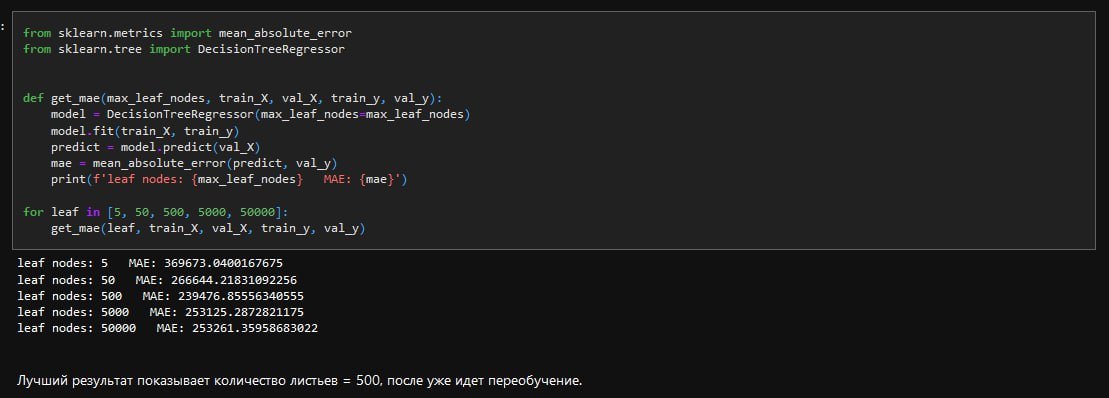
<br><br>
Тоже самое можно проделать и с моделями.<br>
<br>
Но у такого подхода есть некоторые недостатки. Представьте, что у вас есть набор данных с 5000 объектов. Обычно мы сохраняем около 20% на тестовую выборку, то есть 1000 объектов.<br>
Но эти объекты выбираются случайно, то есть один раз модель работала с набором из 1000 объектов хорошо, а в другой раз набор из 1000 объектов стал другим (но все с тех же 5000) и показал плохой результат.<br>
Чем больше у нас тестовый набор данных, тем меньше в нем случайностей(или "шума") и тем точнее метрика будет давать результаты.<br>
К сожалению, мы можем получить дополнительные тестовые объекты только из обучающего набора, но тогда модель хуже будет обучаться.<br>
<br>
С этой проблемой поможет нам <b>cross-validation или перекрестная проверка</b>.<br>
При <b>cross-validation</b> мы запускаем процесс обучения и предсказания на разных выборках из набора данных, чтобы получить несколько показателей качества модели.<br>
<br>
Например, мы могли бы начать с разделения данных на 5 частей, каждая их которых составляет 20% от полного набора данных. В этом случае говорят, что данные разбиты на 5 folds.<br>
Затем мы проводим по одному эксперементу для каждого folds.
<br>
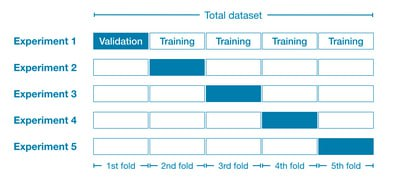
<br>
В эксперименте 1 мы используем первый fold в качестве проверочного (или контрольного) набора, а все остальные - в качестве обучающий данных. Это дает нам качество модели, основанную на 20-процентном тестовом наборе.<br>
В эксперименте 2 мы используем второй fold в качестве проверочного, а на остальных обучаемся.<br>
Мы повторяем этот процесс, используя каждый fold по одному разу в качестве тестового набора
